In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [2]:
!pip install openpyxl
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_df.set_index('id', inplace=True)
train_df.head()

,Unnamed: 0.1,Unnamed: 0,name,neighborhood_overview,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,monthly_revenue
id,,,,,,,,,,,,,,,,,,,,,
19792418,0,879,Home in Vancouver · ★4.75 · 1 bedroom · 1 bed ...,Everything you need is nearby. <br /><br />Hig...,57488206,Jessi,NaN,NaN,NaN,f,...,4.80,4.82,4.90,4.87,4.69,4.81,f,3,0.77,2108
1015650685503221866,1,6416,Guest suite in Vancouver · ★New · 2 bedrooms ·...,NaN,139792573,Daniel,within a few hours,100%,100%,f,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1,NaN,2730
35265562,2,1820,Guest suite in Vancouver · ★4.85 · 2 bedrooms ...,Beautiful neighbourhood close to prosperous Ma...,265504225,Alex,within an hour,100%,98%,t,...,4.90,4.78,4.97,4.94,4.90,4.75,f,1,3.22,2254
911948980885194155,3,5346,Home in Vancouver · ★5.0 · 1 bedroom · 1 bed ·...,We are located in a quiet residential neighbor...,22595056,Raymond,NaN,NaN,92%,t,...,5.00,5.00,5.00,5.00,4.86,5.00,f,1,1.28,3187
46069251,4,2484,Guest suite in Vancouver · ★4.93 · 1 bedroom ·...,Kitsilano at it's best! Short walk to all the ...,65683877,Yendi,within an hour,100%,95%,t,...,4.93,4.89,4.97,4.97,4.96,4.85,f,1,2.01,3479


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5352 entries, 19792418 to 19298482
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0.1                    5352 non-null   int64  
 1   Unnamed: 0                      5352 non-null   int64  
 2   name                            5352 non-null   object 
 3   neighborhood_overview           3476 non-null   object 
 4   host_id                         5352 non-null   int64  
 5   host_name                       5352 non-null   object 
 6   host_response_time              4263 non-null   object 
 7   host_response_rate              4263 non-null   object 
 8   host_acceptance_rate            4620 non-null   object 
 9   host_is_superhost               5315 non-null   object 
 10  host_listings_count             5352 non-null   int64  
 11  host_total_listings_count       5352 non-null   int64  
 12  neighbourhood               

In [5]:
train_df.drop(train_df.columns[0], axis=1, inplace=True)
train_df.head()

,Unnamed: 0,name,neighborhood_overview,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,monthly_revenue
id,,,,,,,,,,,,,,,,,,,,,
19792418,879,Home in Vancouver · ★4.75 · 1 bedroom · 1 bed ...,Everything you need is nearby. <br /><br />Hig...,57488206,Jessi,NaN,NaN,NaN,f,3,...,4.80,4.82,4.90,4.87,4.69,4.81,f,3,0.77,2108
1015650685503221866,6416,Guest suite in Vancouver · ★New · 2 bedrooms ·...,NaN,139792573,Daniel,within a few hours,100%,100%,f,1,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1,NaN,2730
35265562,1820,Guest suite in Vancouver · ★4.85 · 2 bedrooms ...,Beautiful neighbourhood close to prosperous Ma...,265504225,Alex,within an hour,100%,98%,t,1,...,4.90,4.78,4.97,4.94,4.90,4.75,f,1,3.22,2254
911948980885194155,5346,Home in Vancouver · ★5.0 · 1 bedroom · 1 bed ·...,We are located in a quiet residential neighbor...,22595056,Raymond,NaN,NaN,92%,t,1,...,5.00,5.00,5.00,5.00,4.86,5.00,f,1,1.28,3187
46069251,2484,Guest suite in Vancouver · ★4.93 · 1 bedroom ·...,Kitsilano at it's best! Short walk to all the ...,65683877,Yendi,within an hour,100%,95%,t,2,...,4.93,4.89,4.97,4.97,4.96,4.85,f,1,2.01,3479


### List of columns contain missing data in the training dataset: ###

In [6]:
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))  # Columns with missing data

neighborhood_overview          1876
neighbourhood                  1876
host_response_time             1089
host_response_rate             1089
reviews_per_month               906
review_scores_checkin           901
review_scores_location          901
review_scores_value             901
review_scores_rating            900
review_scores_accuracy          900
review_scores_cleanliness       900
review_scores_communication     900
host_acceptance_rate            732
price                           665
host_is_superhost                37
beds                             36
dtype: int64


#### 1. Extract information from _name_ column ####
<b>- Assumption 1:</b> For studio, assume there is 1 bed <br><br>
<b>- Assumption 2: </b> After extracting information on number of bedrooms from column _name_, there are 3 rows that has no information about _bedrooms_. From manual observation, those 3 rows are 2 Camper/RV housing and 1 Boat housing. Looking from the whole 5353 rows of training dataset, there are 4 Camper/RV has the number of beds equal to the number of bedrooms. Therefore, to fill the NaN values, we also assume the _bedrooms_ values for Camper/RV are the corresponding number of _beds_. Same for Boat. <br><br>
<b>- Assumption 3: </b> The code currently assume all "shared bath" or "private bath" keywords to return 1 bed. HOWEVER, THIS NEEDS TO BE VERTIFIED MANUALLY TO ENSURE THEY HAD ONLY 1 SHARED BATH OR 1 PRIVATE BATH.

In [7]:
# Regex patterns for extraction
# property_type_pattern = r"^(.*?) in Vancouver"
rating_pattern = r"★([0-9.]+|New)"
bedrooms_pattern = r"(\d+) bedroom"
beds_pattern = r"(\d+) bed"
baths_pattern = r"(\d+) bath"

# Functions to extract each feature
#def extract_property_type(name):
#    match = re.search(property_type_pattern, name)
#    return match.group(1) if match else None

def extract_rating(name):
    match = re.search(rating_pattern, name)
    return float(match.group(1)) if match and match.group(1).replace('.', '', 1).isdigit() else None

def extract_bedrooms(name):
    match = re.search(bedrooms_pattern, name)
    return int(match.group(1)) if match else (0 if 'Studio' in name else None)

def extract_beds(name):
    match = re.search(beds_pattern, name)
    # Return the extracted value as float or np.nan for missing values
    return float(match.group(1)) if match else np.nan

def extract_baths(name):
    # First, try to match the numeric value before "bath" in general
    match = re.search(baths_pattern, name)
    if match:
        return int(match.group(1))
    # Then, handle cases with "shared bath" or "private bath". Assume 
    shared_or_private_match = re.search(r"(\d+)\s+(shared|private)\s+bath", name.lower())
    if shared_or_private_match:
        return int(shared_or_private_match.group(1))  # Extract the numeric value
    # If no match, return None
    return None

# Apply functions to extract features
# train_df['property_type'] = train_df['name'].apply(extract_property_type)
train_df['rating'] = train_df['name'].apply(extract_rating)
train_df['bedrooms'] = train_df['name'].apply(extract_bedrooms)
train_df.loc[train_df['beds'].isnull(), 'beds'] = train_df.loc[train_df['beds'].isnull(), 'name'].apply(extract_beds).astype(float)
train_df['baths'] = train_df['name'].apply(extract_baths)

# Fill missing ratings for "New" as a separate indicator
train_df['is_new_listing'] = train_df['rating'].isnull().astype(int)
train_df['rating'] = train_df['rating'].fillna(0)  # Optional: set "New" ratings to 0 or another placeholder

# Show resulting DataFrame
train_df.head()

,Unnamed: 0,name,neighborhood_overview,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,monthly_revenue,rating,bedrooms,baths,is_new_listing
id,,,,,,,,,,,,,,,,,,,,,
19792418,879,Home in Vancouver · ★4.75 · 1 bedroom · 1 bed ...,Everything you need is nearby. <br /><br />Hig...,57488206,Jessi,NaN,NaN,NaN,f,3,...,4.69,4.81,f,3,0.77,2108,4.75,1.0,1.0,0
1015650685503221866,6416,Guest suite in Vancouver · ★New · 2 bedrooms ·...,NaN,139792573,Daniel,within a few hours,100%,100%,f,1,...,NaN,NaN,f,1,NaN,2730,0.00,2.0,1.0,1
35265562,1820,Guest suite in Vancouver · ★4.85 · 2 bedrooms ...,Beautiful neighbourhood close to prosperous Ma...,265504225,Alex,within an hour,100%,98%,t,1,...,4.90,4.75,f,1,3.22,2254,4.85,2.0,1.0,0
911948980885194155,5346,Home in Vancouver · ★5.0 · 1 bedroom · 1 bed ·...,We are located in a quiet residential neighbor...,22595056,Raymond,NaN,NaN,92%,t,1,...,4.86,5.00,f,1,1.28,3187,5.00,1.0,1.0,0
46069251,2484,Guest suite in Vancouver · ★4.93 · 1 bedroom ·...,Kitsilano at it's best! Short walk to all the ...,65683877,Yendi,within an hour,100%,95%,t,2,...,4.96,4.85,f,1,2.01,3479,4.93,1.0,1.0,0


In [8]:
# Fill NaN values in 'beds' with 1 if 'name' contains the keyword "Studio"
train_df.loc[
    (train_df['beds'].isnull()) & (train_df['name'].str.contains('Studio', na=False, case=False)),
    'beds'
] = 1

In [9]:
# Fill NaN values in 'bedrooms' with the corresponding values from 'beds'
train_df.loc[train_df['bedrooms'].isnull(), 'bedrooms'] = train_df.loc[train_df['bedrooms'].isnull(), 'beds']

In [10]:
# Handle remaining NaN values in the baths column
def handle_remaining_baths(name):
    # Handle "half-bath", "Shared half-bath", or "Private half-bath" as 1 bath
    if "half-bath" in name.lower():
        return 1  # Assign 1 bath for "half-bath" cases
    if "shared bath" in name.lower():
        return 1  # Assign 1 bath for "shared bath" cases
    if "private bath" in name.lower():
        return 1  # Assign 1 bath for "private bath" cases
    
    # If no bath information, return 0
    return 0

# Apply only to rows where 'baths' is still NaN
train_df.loc[train_df['baths'].isnull(), 'baths'] = train_df.loc[train_df['baths'].isnull(), 'name'].apply(handle_remaining_baths)

In [11]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

neighborhood_overview          1876
neighbourhood                  1876
host_response_time             1089
host_response_rate             1089
reviews_per_month               906
review_scores_checkin           901
review_scores_location          901
review_scores_value             901
review_scores_rating            900
review_scores_accuracy          900
review_scores_cleanliness       900
review_scores_communication     900
host_acceptance_rate            732
price                           665
host_is_superhost                37
dtype: int64


<br><b>- Assumption 4:</b> When the value of _number_of_reviews_ is 0, we assume that the remaining 7 _review_ columns are all 0. The valid range of _review_ columns is from 1 to 5 <br>

In [12]:
# List of review-related columns
review_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
]

# Set these columns to 0 for rows where number_of_reviews is 0
train_df.loc[train_df['number_of_reviews'] == 0, review_columns] = 0

In [13]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

neighborhood_overview     1876
neighbourhood             1876
host_response_time        1089
host_response_rate        1089
host_acceptance_rate       732
price                      665
host_is_superhost           37
review_scores_checkin        1
review_scores_location       1
review_scores_value          1
dtype: int64


From manual observation, 1 row with NaN values in review_scores_checkin, review_scores_location, review_scores_value (as shown above) has the value of 5 in all 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_communication'. Therefore, we put 5 (mean value) into the remaining 3 NaN columns. There is only 1 row that has this issue, so it will not affect the whole 5353 rows of training data. 

DOUBLE CHECK THE TESTING DATA - THERE MIGHT BE MORE ROWS WITH THE SAME ISSUE THAN THIS TRAINING DATA.

In [14]:
# Columns to calculate the average from
average_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_communication'
]

# Columns to fill missing values
target_columns = [
    'review_scores_checkin',
    'review_scores_location',
    'review_scores_value'
]

# Fill missing values in the target columns
for col in target_columns:
    # Calculate the average and fill missing values
    train_df[col] = train_df[col].fillna(
        train_df[average_columns].mean(axis=1)
    )

In [15]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

neighborhood_overview    1876
neighbourhood            1876
host_response_time       1089
host_response_rate       1089
host_acceptance_rate      732
price                     665
host_is_superhost          37
dtype: int64


<br><b>- Assumption 5:</b> All locations are in Vancouver, British Columbia, Canada <br>

In [16]:
# Fill NaN values in the 'neighbourhood' column with 'Vancouver'
train_df['neighbourhood'] = train_df['neighbourhood'].fillna('Vancouver')

In [17]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

neighborhood_overview    1876
host_response_time       1089
host_response_rate       1089
host_acceptance_rate      732
price                     665
host_is_superhost          37
dtype: int64


<br>
For NaN values in 'neighborhood_overview', a text "No description provided" will be placed instead.
The following code will identify the most popular keywords in the 'neighborhood_overview' column.

<br>

In [18]:
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

train_df['neighborhood_overview'] = train_df['neighborhood_overview'].fillna("No description provided")
train_df['neighborhood_overview'] = train_df['neighborhood_overview'].apply(lambda x: re.sub(r'<.*?>', '', str(x)))

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Combine all rows of 'neighborhood_overview' into one large string
all_text = ' '.join(train_df['neighborhood_overview'].dropna().astype(str))

# Remove special characters and make all text lowercase
cleaned_text = re.sub(r'[^\w\s]', '', all_text).lower()

# Tokenize the text into individual words
words = cleaned_text.split()

# Remove stopwords (e.g., "and", "the", "in")
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the most common words
most_common_words = word_counts.most_common(50)  # Top 20 most common words

# Display the result
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


Most Common Words:
vancouver: 2297
restaurants: 1893
provided: 1886
description: 1882
walk: 1720
downtown: 1531
street: 1471
park: 1447
away: 1223
shops: 1161
neighbourhood: 1100
located: 999
area: 917
walking: 902
drive: 891
shopping: 841
minutes: 809
minute: 758
within: 756
neighborhood: 744
distance: 735
also: 695
west: 694
close: 685
one: 651
city: 638
coffee: 625
place: 620
vancouvers: 617
many: 609
bus: 588
stores: 583
granville: 576
beach: 572
parks: 554
great: 540
quiet: 536
home: 526
community: 519
blocks: 516
main: 513
yaletown: 512
grocery: 503
min: 496
local: 496
best: 487
5: 471
vibrant: 469
stanley: 468
centre: 444


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harrypotter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


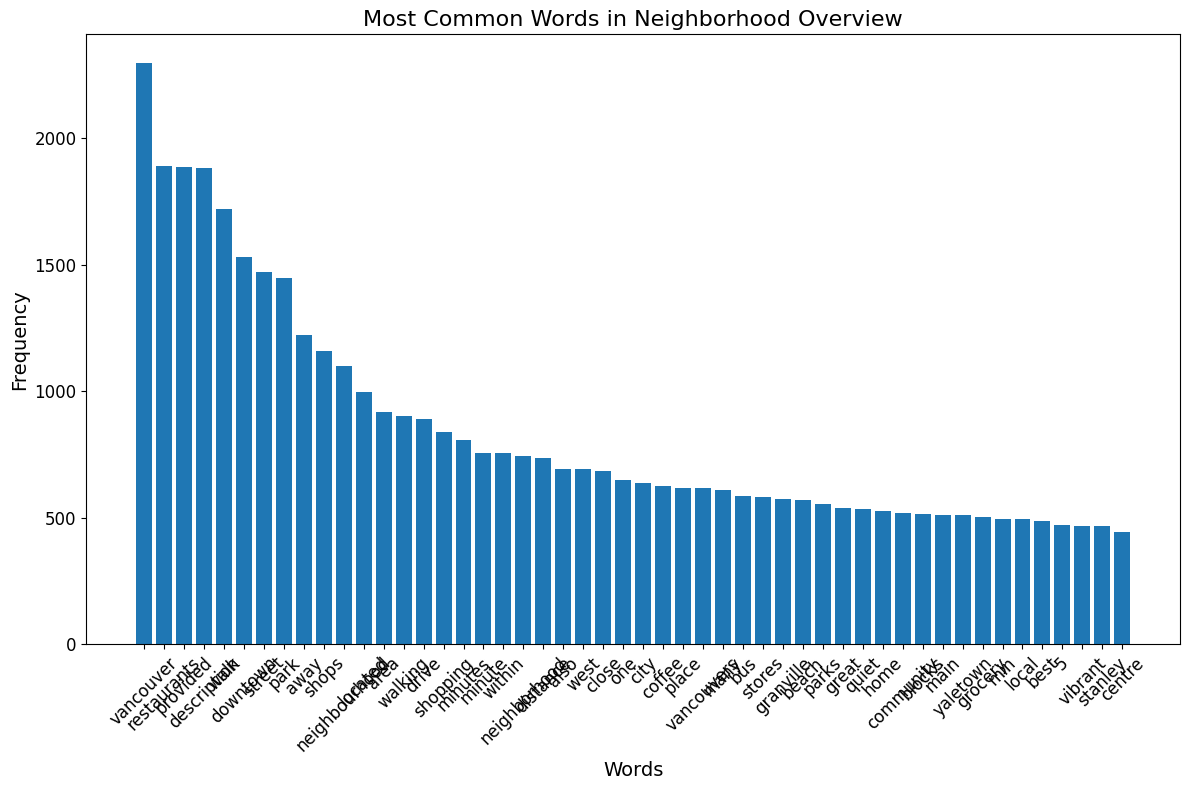

In [19]:
# Keyword distribution visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.xticks(rotation=45, fontsize=12)  # Rotate and enlarge x-axis labels for readability
plt.yticks(fontsize=12)  # Enlarge y-axis labels
plt.title("Most Common Words in Neighborhood Overview", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()  # Ensure everything fits without overlapping
plt.show()

<br> From the top 10 relavant keywords, extract them into individual columns, with 1 being keyword presented, and 0 being no keyword found in that row. <br>

In [20]:
# Keyword presence feature extraction
def has_keyword(text, keyword):
    return int(bool(re.search(r'\b' + keyword + r'\b', text.lower())))

# Apply keyword search for various categories
keywords = ['restaurant', 'downtown', 'park', 'shops', 'shopping', 'city', 'coffee', 'bus', 'stores'] #'beach', 'quiet', 'transit', 'lively', 'trendy']
for keyword in keywords:
    train_df[f'has_{keyword}'] = train_df['neighborhood_overview'].apply(lambda x: has_keyword(x, keyword))

# Sentiment Analysis
train_df['polarity'] = train_df['neighborhood_overview'].apply(lambda x: TextBlob(x).sentiment.polarity)
train_df['subjectivity'] = train_df['neighborhood_overview'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Text Length
train_df['review_length'] = train_df['neighborhood_overview'].apply(lambda x: len(x.split()))

<br> Keyword _shops_ and _shopping_ are quite similar, so we merge them into one new column: 'has_shop'  <br>

In [21]:
# Create the new column 'has_shop' based on the logic
train_df['has_shop'] = (
    (train_df['has_shops'] == 1) | (train_df['has_shopping'] == 1)
).astype(int)

# Delete the original columns 'has_shops' and 'has_shopping'
train_df.drop(['has_shops', 'has_shopping'], axis=1, inplace=True)

<br> Convert the string value in 'host_response_rate' and 'host_acceptance_rate' to numerical values, ranging from 0-1. <br>

In [22]:
#train_df['host_response_rate'] = train_df['host_response_rate'].str.strip('%').astype(float) / 100
#train_df['host_response_rate'].fillna(0, inplace=True) 
#train_df['host_acceptance_rate'] = train_df['host_acceptance_rate'].str.strip('%').astype(float) / 100
#train_df['host_acceptance_rate'].fillna(0, inplace=True) 


# Convert 'host_response_rate' to numerical values
train_df['host_response_rate'] = (
    train_df['host_response_rate']
    .str.strip('%')  # Remove the '%' character
    .astype(float)    # Convert the string to float
    / 100             # Convert percentage to a decimal
)

# Convert 'host_acceptance_rate' to numerical values
train_df['host_acceptance_rate'] = (
    train_df['host_acceptance_rate']
    .str.strip('%')  # Remove the '%' character
    .astype(float)    # Convert the string to float
    / 100             # Convert percentage to a decimal
)

In [23]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

host_response_time      1089
host_response_rate      1089
host_acceptance_rate     732
price                    665
host_is_superhost         37
dtype: int64


<br> Create a correlation matrix to find the correlation between the remaining columns with NaN value presented and 'monthly_revenue' <br>

In [24]:
# # Step 1: Encode 'host_response_time' into numerical values
# response_time_mapping = {
#     'within an hour': 1,
#     'within a few hours': 2,
#     'within a day': 3,
#     'a few days or more': 4
# }
# train_df['host_response_time_encoded'] = train_df['host_response_time'].map(response_time_mapping)

# # Step 2: Encode 'host_is_superhost' (f -> 0, t -> 1)
# train_df['host_is_superhost_encoded'] = train_df['host_is_superhost'].map({'f': 0, 't': 1})

# # Step 3: Select the columns of interest
# columns_of_interest = [
#     'host_response_time_encoded', 
#     'host_response_rate', 
#     'host_acceptance_rate', 
#     'host_is_superhost_encoded', 
#     'monthly_revenue'
# ]

# # Step 4: Drop rows with NaN values in the columns of interest
# filtered_data = train_df[columns_of_interest].dropna()

# # Step 5: Compute the correlation matrix
# correlation_matrix = filtered_data.corr()

# # Step 6: Visualize the correlation matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
# plt.title("Correlation Matrix (NaN Values Skipped)")
# plt.show()


<br>
The correlation among the remaining 4 columns with monthly_revenue is too low => Drop them completely
<br>

In [25]:

data = train_df
data['host_response_time'] = data['host_response_time'].astype('category')


from sklearn.linear_model import LinearRegression, LogisticRegression
if 'unknown' not in data['host_response_time'].cat.categories:
    data['host_response_time'] = data['host_response_time'].cat.add_categories(['unknown'])
data['host_response_time'] = data['host_response_time'].fillna('unknown')
    
    # Impute missing rates
data['host_response_rate'] = data['host_response_rate'].fillna(data['host_response_rate'].median())
data['host_acceptance_rate'] = data['host_acceptance_rate'].fillna(data['host_acceptance_rate'].median())


predictors = [
    'host_response_rate', 'host_acceptance_rate', 'number_of_reviews',
    'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 
    'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month'
    ]

target = 'host_is_superhost'
    # Handle missing values in target
train_data = data[data[target].notnull()]
test_data = data[data[target].isnull()]
    

    
# Predict missing target values
X_train = train_data[predictors]
y_train = train_data[target]
X_test = test_data[predictors]
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train_scaled, y_train)
    
y_test_pred = model.predict(X_test_scaled)
data.loc[test_data.index, target] = y_test_pred

train_df = data

In [26]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

price    665
dtype: int64


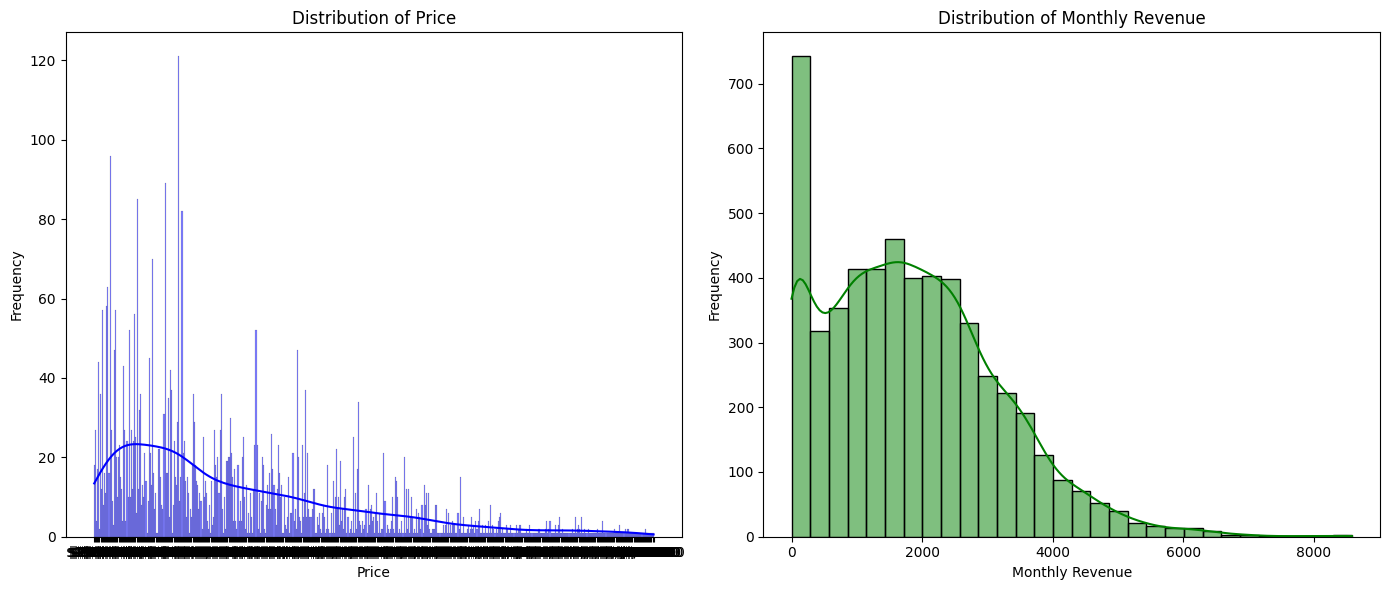

In [27]:
# Set up the figure
import seaborn as sns
plt.figure(figsize=(14, 6))

# Plot distribution of price
plt.subplot(1, 2, 1)  # First subplot
sns.histplot(train_df['price'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot distribution of monthly_revenue
plt.subplot(1, 2, 2)  # Second subplot
sns.histplot(train_df['monthly_revenue'], kde=True, bins=30, color='green', edgecolor='black')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

<br>
As the distribution of price highly shifted to the left, using mean value is not ideal here. Instead, we use the median value to replace the NaN values in column 'price'. To make it more accurate, we group the most relavant features (strongest correlation) and calculate the median value based on those factors. 
<br>

In [28]:
train_df['price'] = train_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check correlations of numeric columns with 'price'
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = train_df[numerical_cols].corr()
revenue_correlation = correlation_matrix['price']

print(revenue_correlation)

Unnamed: 0                       -0.007338
host_id                          -0.021705
host_response_rate               -0.024610
host_acceptance_rate             -0.020055
host_listings_count               0.005377
host_total_listings_count         0.011299
latitude                          0.046788
longitude                        -0.073243
accommodates                      0.221696
beds                              0.198735
price                             1.000000
minimum_nights                    0.002961
maximum_nights                    0.011642
minimum_nights_avg_ntm           -0.000128
maximum_nights_avg_ntm           -0.008973
availability_30                   0.059841
availability_60                   0.050921
availability_90                   0.046747
availability_365                  0.069689
number_of_reviews                -0.038360
number_of_reviews_ltm            -0.042969
review_scores_rating             -0.061133
review_scores_accuracy           -0.062134
review_scor

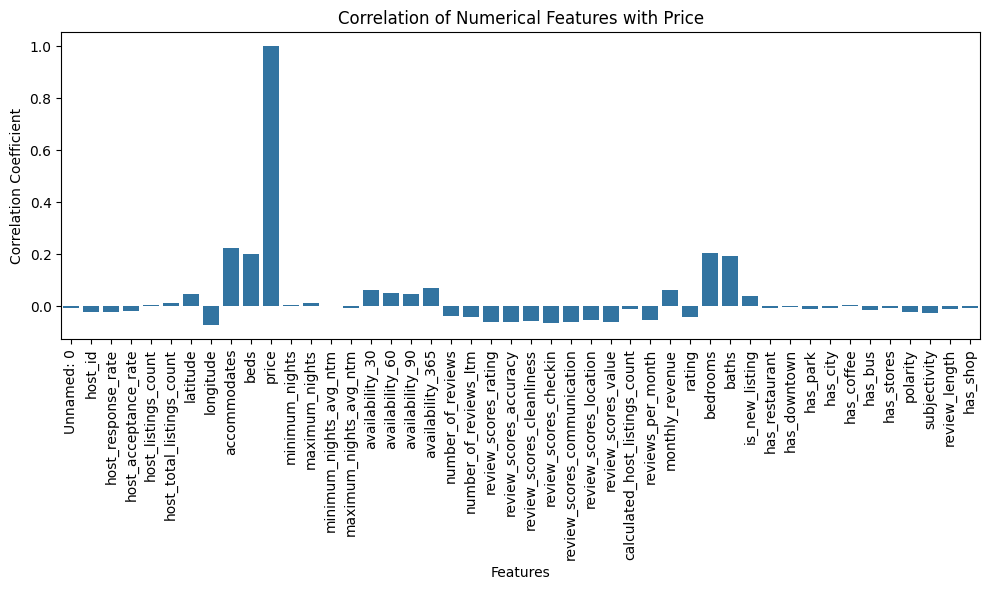

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_correlation.index, y=revenue_correlation.values)
plt.xticks(rotation=90)
plt.title("Correlation of Numerical Features with Price")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

## Price

In [30]:
# Check groups where all values for price are NaN
#grouped = train_df.groupby(['accommodates', 'beds', 'baths', 'bedrooms'])
#empty_groups = grouped['price'].apply(lambda x: x.isnull().all())
#print(empty_groups[empty_groups])  # Display groups with all NaN


In [31]:
# Group by average neighbourhood
neighbourhood_avg = train_df.groupby('neighbourhood_cleansed')['price'].mean()
neighbourhood_avg

train_df['price'] = train_df.apply(
    lambda row: neighbourhood_avg[row['neighbourhood_cleansed']] if pd.isna(row['price']) else row['price'], axis=1
)

In [32]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

Series([], dtype: int64)


In [33]:
# Drop amenities
train_df.drop(columns=['amenities'], inplace=True)

In [34]:
# Save the updated DataFrame to a new Excel sheet
train_df.to_csv('cleaned_data.csv', index=False)

print("Data saved to 'cleaned_data.csv'")

Data saved to 'cleaned_data.csv'


<br> <b>However, it is still worth to reconsider about the wrangling process in 5 columns of 'host' and 'price'. Because filling the column 'price' with median values make the distribution graph look like this:<b><br>

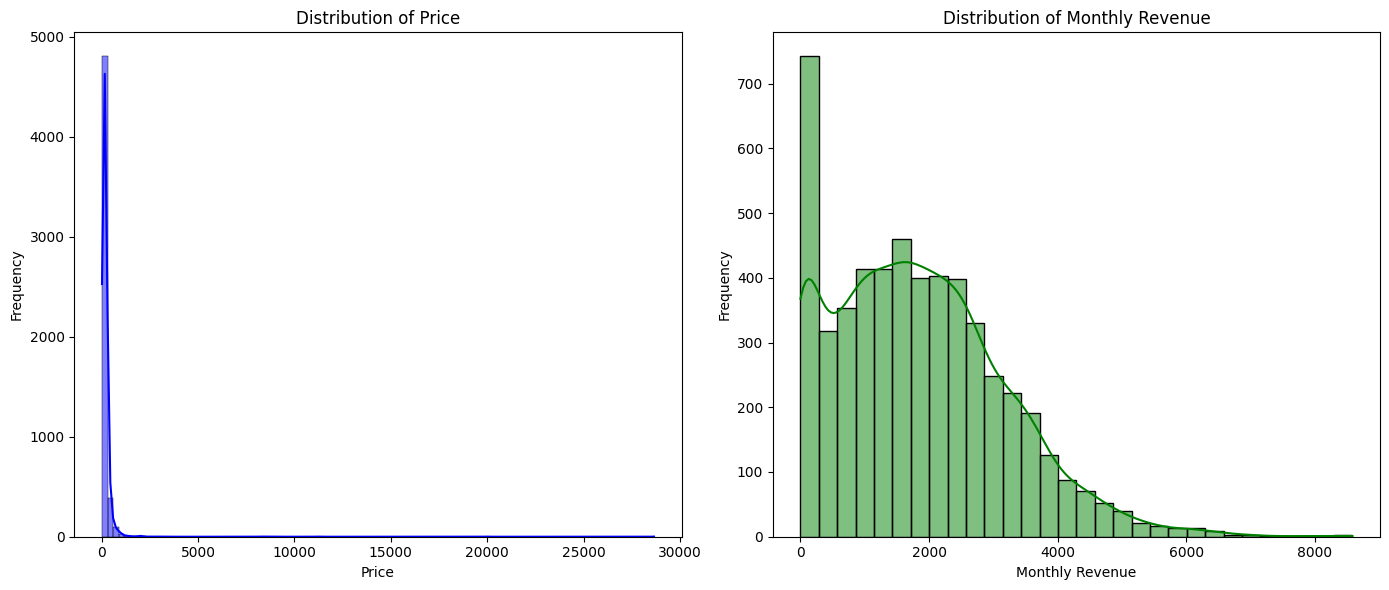

In [35]:
# Set up the figure
plt.figure(figsize=(14, 6))

# Plot distribution of price
plt.subplot(1, 2, 1)  # First subplot
sns.histplot(train_df['price'], kde=True, bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot distribution of monthly_revenue
plt.subplot(1, 2, 2)  # Second subplot
sns.histplot(train_df['monthly_revenue'], kde=True, bins=30, color='green', edgecolor='black')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

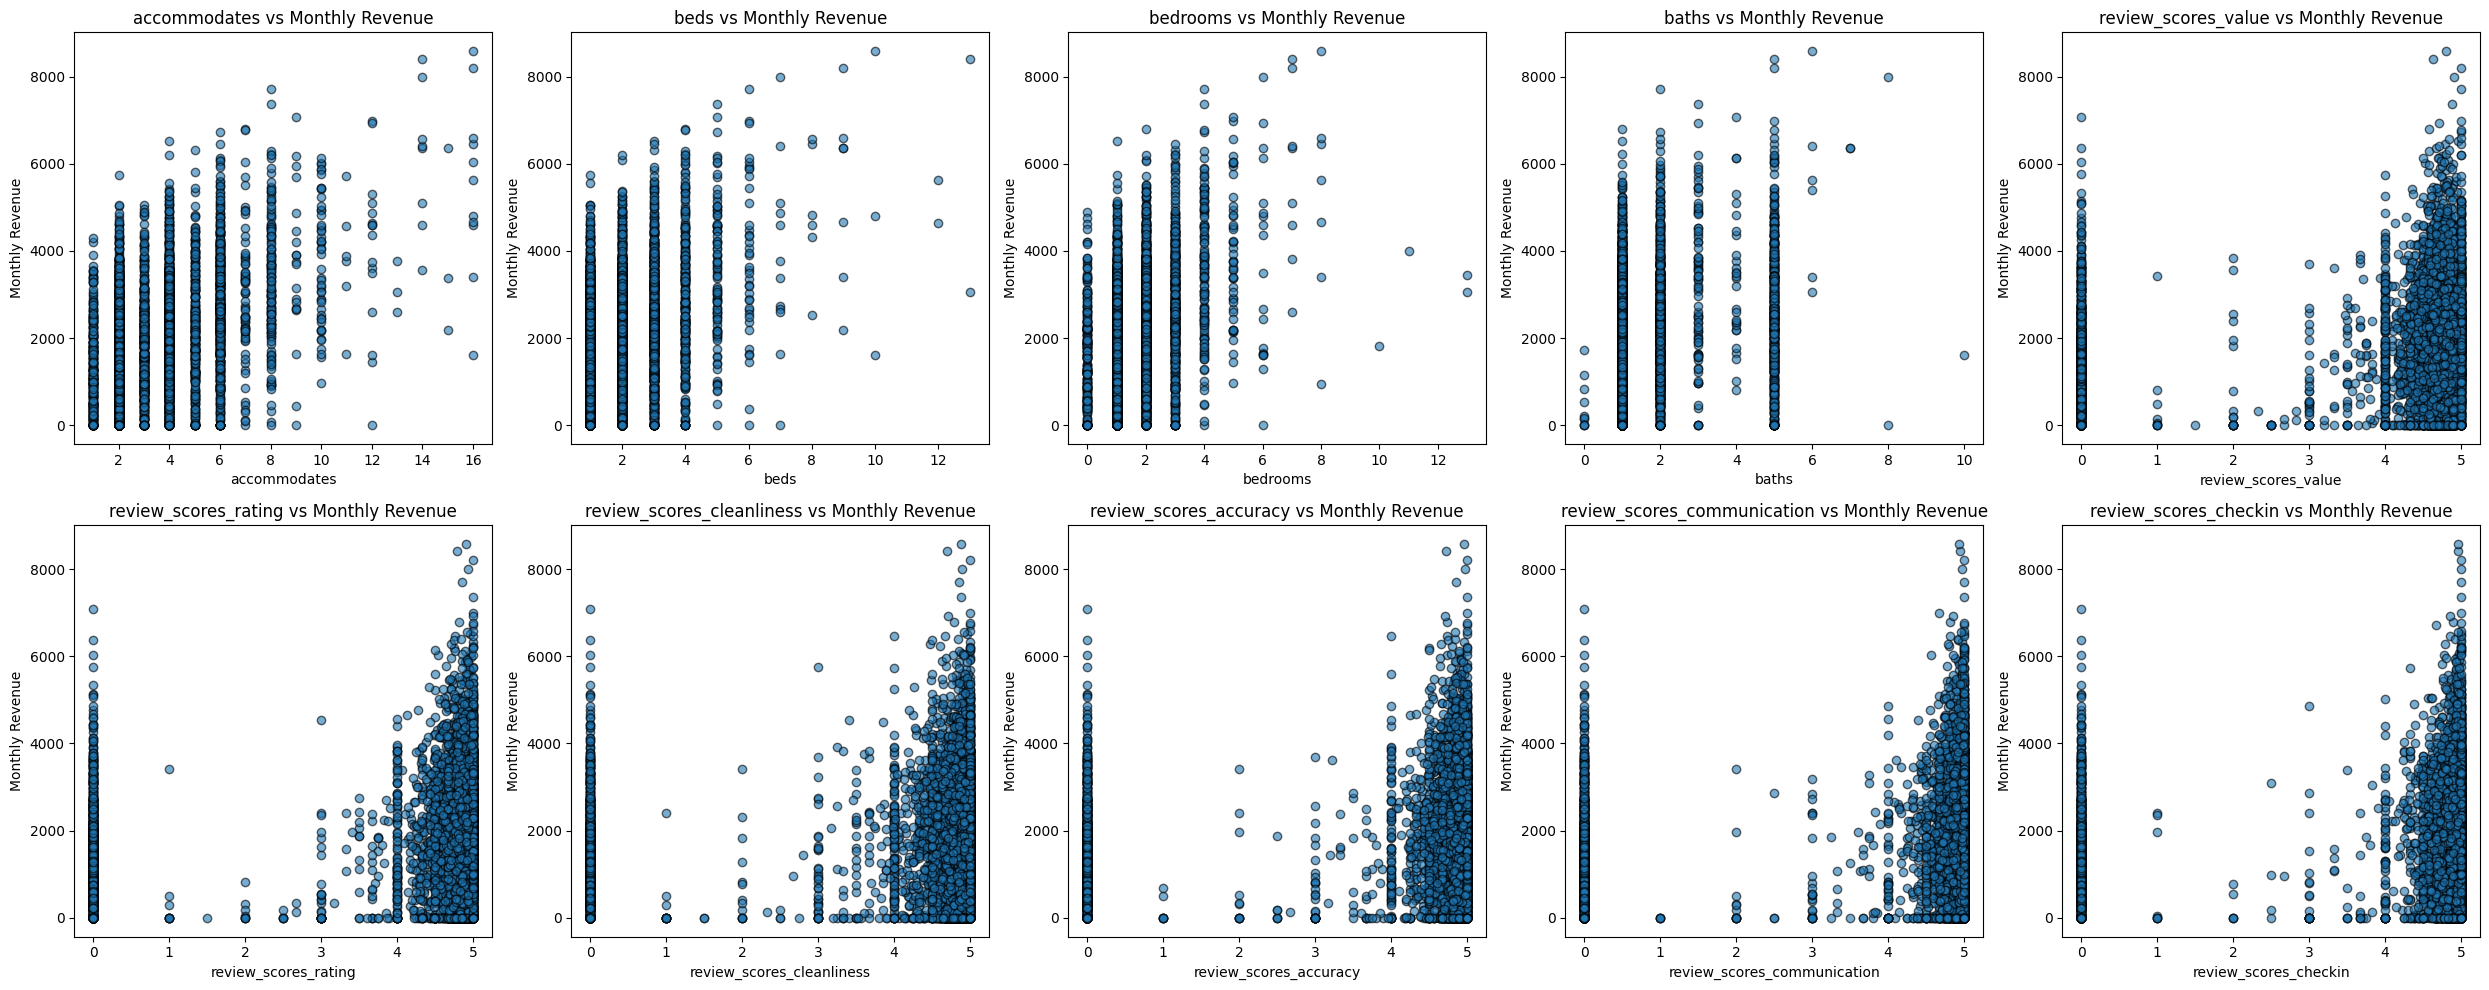

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('cleaned_data.xlsx')


# Select only numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Get the top 10 features most correlated with 'monthly_revenue'
top_10_features = correlation_matrix['monthly_revenue'].abs().sort_values(ascending=False)[1:11]

# Plot 'monthly_revenue' against each of the top 10 features
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))  # 2 rows, 5 columns
axes = axes.flatten()

for idx, feature in enumerate(top_10_features.index):
    axes[idx].scatter(data[feature], data['monthly_revenue'], alpha=0.6, edgecolor='k')
    axes[idx].set_title(f'{feature} vs Monthly Revenue')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Monthly Revenue')

# Hide any unused subplots
for i in range(len(top_10_features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()



## Wrangling the testing dataset (copy from the process above)

In [37]:
missing_values_1 = test_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

bathrooms                      1339
bedrooms                       1338
neighborhood_overview           455
neighbourhood                   455
host_response_rate              274
host_response_time              274
reviews_per_month               233
review_scores_rating            232
review_scores_accuracy          232
review_scores_cleanliness       232
review_scores_checkin           232
review_scores_communication     232
review_scores_location          232
review_scores_value             232
host_acceptance_rate            195
price                           175
host_is_superhost                10
beds                              9
dtype: int64


In [38]:
# Wrangling the testing set
# Regex patterns for extraction
# property_type_pattern = r"^(.*?) in Vancouver"
rating_pattern = r"★([0-9.]+|New)"
bedrooms_pattern = r"(\d+) bedroom"
beds_pattern = r"(\d+) bed"
baths_pattern = r"(\d+) bath"

# Functions to extract each feature
#def extract_property_type(name):
#    match = re.search(property_type_pattern, name)
#    return match.group(1) if match else None

def extract_rating(name):
    match = re.search(rating_pattern, name)
    return float(match.group(1)) if match and match.group(1).replace('.', '', 1).isdigit() else None

def extract_bedrooms(name):
    match = re.search(bedrooms_pattern, name)
    return int(match.group(1)) if match else (0 if 'Studio' in name else None)

def extract_beds(name):
    match = re.search(beds_pattern, name)
    # Return the extracted value as float or np.nan for missing values
    return float(match.group(1)) if match else np.nan

def extract_baths(name):
    # First, try to match the numeric value before "bath" in general
    match = re.search(baths_pattern, name)
    if match:
        return int(match.group(1))
    # Then, handle cases with "shared bath" or "private bath"
    shared_or_private_match = re.search(r"(\d+)\s+(shared|private)\s+bath", name.lower())
    if shared_or_private_match:
        return int(shared_or_private_match.group(1))  # Extract the numeric value
    # If no match, return None
    return None

# Apply functions to extract features
# train_df['property_type'] = train_df['name'].apply(extract_property_type)
test_df['rating'] = test_df['name'].apply(extract_rating)
test_df['bedrooms'] = test_df['name'].apply(extract_bedrooms)
test_df.loc[test_df['beds'].isnull(), 'beds'] = test_df.loc[test_df['beds'].isnull(), 'name'].apply(extract_beds).astype(float)
test_df['baths'] = test_df['name'].apply(extract_baths)

# Fill missing ratings for "New" as a separate indicator
test_df['is_new_listing'] = test_df['rating'].isnull().astype(int)
test_df['rating'] = test_df['rating'].fillna(0)  # Optional: set "New" ratings to 0 or another placeholder

# Show resulting DataFrame
test_df.head()

,id,name,neighborhood_overview,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,rating,baths,is_new_listing
0,4465400,Home in Vancouver · ★4.98 · 4 bedrooms · 4 bed...,We are less than a block to Kits pool - the la...,23168796,Oliver & Ashleigh,within a few hours,100%,67%,f,1,...,5.00,5.00,4.98,4.88,f,1,0.38,4.98,5,0
1,608629349064811166,Rental unit in Vancouver · 1 bedroom · 1 bed ·...,One of the most eclectic areas in the Lower Ma...,16926150,Jesse,NaN,NaN,NaN,f,1,...,NaN,NaN,NaN,NaN,f,1,NaN,0.00,1,1
2,981894508939312892,Rental unit in Vancouver · ★5.0 · 1 bedroom · ...,Le Soleil Hotel and Suites is situated in the ...,536871978,Ivan,within an hour,100%,95%,f,4,...,5.00,5.00,5.00,4.88,f,4,2.96,5.00,1,0
3,52014961,Guest suite in Vancouver · ★4.79 · 2 bedrooms ...,"Very safe and quite area,also very convenient ...",421206568,Xuerong,within an hour,100%,98%,t,4,...,4.93,4.96,4.77,4.69,f,4,2.53,4.79,2,0
4,836285112356489303,Rental unit in Vancouver · ★5.0 · 1 bedroom · ...,Mount Pleasant is a largely residential area w...,227662329,Jordan,within an hour,100%,100%,f,168,...,5.00,5.00,5.00,5.00,t,134,0.47,5.00,1,0


Most Common Words:
vancouver: 625
restaurants: 527
description: 457
provided: 455
walk: 412
downtown: 404
street: 365
park: 364
away: 325
neighbourhood: 303
located: 294
shops: 287
area: 239
shopping: 221
walking: 221
minutes: 217
drive: 211
close: 197
within: 193
also: 191
many: 189
minute: 185
neighborhood: 185
distance: 182
one: 176
beach: 175
city: 173
vancouvers: 168
west: 167
home: 167
yaletown: 154
stores: 151
coffee: 149
place: 148
quiet: 146
parks: 144
grocery: 142
granville: 141
best: 139
bus: 125
vibrant: 125
kitsilano: 124
blocks: 124
beautiful: 123
great: 123
location: 122
local: 121
skytrain: 116
store: 116
cafes: 115


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harrypotter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


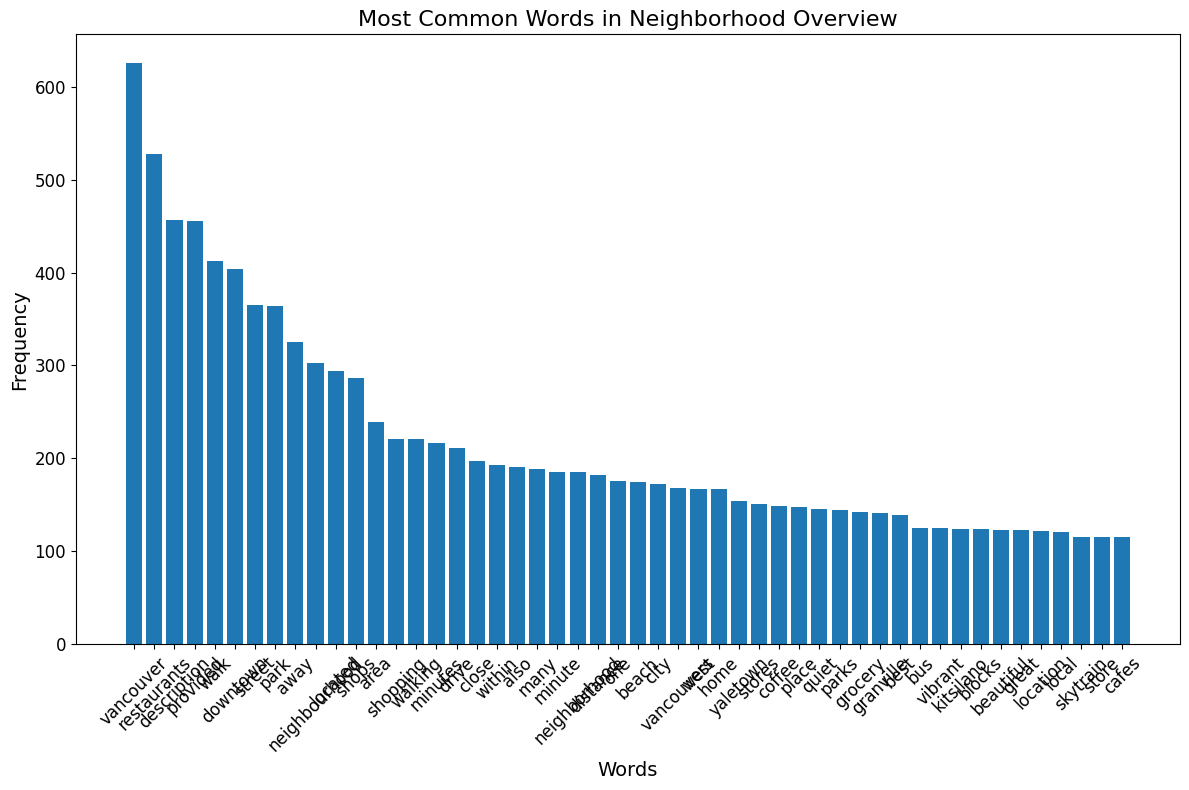

In [39]:
# Fill NaN values in 'beds' with 1 if 'name' contains the keyword "Studio"
test_df.loc[
    (test_df['beds'].isnull()) & (test_df['name'].str.contains('Studio', na=False, case=False)),
    'beds'
] = 1
test_df.loc[test_df['bedrooms'].isnull(), 'bedrooms'] = test_df.loc[test_df['bedrooms'].isnull(), 'beds']

# Handle remaining NaN values in the baths column
def handle_remaining_baths(name):
    # Ensure input is a string
    name = str(name).lower()
    
    # Handle specific cases for "half-bath", "shared bath", or "private bath"
    if "half-bath" in name:
        return 1  # Assign 1 bath for all "half-bath" cases
    if "shared bath" in name:
        return 1  # Assign 1 bath for "shared bath" cases
    if "private bath" in name:
        return 1  # Assign 1 bath for "private bath" cases
    
    # Default to 0 if no information is available
    return 0

# Apply only to rows where 'baths' is still NaN
test_df.loc[test_df['baths'].isnull(), 'baths'] = test_df.loc[test_df['baths'].isnull(), 'name'].apply(handle_remaining_baths).astype(int)


# Apply only to rows where 'baths' is still NaN
#test_df.loc[test_df['baths'].isnull(), 'baths'] = test_df.loc[test_df['baths'].isnull(), 'name'].apply(handle_remaining_baths)

# List of review-related columns
review_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
]

# Set these columns to 0 for rows where number_of_reviews is 0
test_df.loc[test_df['number_of_reviews'] == 0, review_columns] = 0

# Columns to calculate the average from
average_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_communication'
]

# Columns to fill missing values
target_columns = [
    'review_scores_checkin',
    'review_scores_location',
    'review_scores_value'
]

# Fill missing values in the target columns
for col in target_columns:
    # Calculate the average and fill missing values
    test_df[col] = test_df[col].fillna(
        test_df[average_columns].mean(axis=1)
    )

test_df['neighbourhood'] = test_df['neighbourhood'].fillna('Vancouver')

import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

test_df['neighborhood_overview'] = test_df['neighborhood_overview'].fillna("No description provided")
test_df['neighborhood_overview'] = test_df['neighborhood_overview'].apply(lambda x: re.sub(r'<.*?>', '', str(x)))

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Combine all rows of 'neighborhood_overview' into one large string
all_text = ' '.join(test_df['neighborhood_overview'].dropna().astype(str))

# Remove special characters and make all text lowercase
cleaned_text = re.sub(r'[^\w\s]', '', all_text).lower()

# Tokenize the text into individual words
words = cleaned_text.split()

# Remove stopwords (e.g., "and", "the", "in")
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the most common words
most_common_words = word_counts.most_common(50)  # Top 20 most common words

# Display the result
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Create a bar chart with a larger figure size
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.xticks(rotation=45, fontsize=12)  # Rotate and enlarge x-axis labels for readability
plt.yticks(fontsize=12)  # Enlarge y-axis labels
plt.title("Most Common Words in Neighborhood Overview", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()  # Ensure everything fits without overlapping
plt.show()

In [40]:
# Keyword presence feature extraction
def has_keyword(text, keyword):
    return int(bool(re.search(r'\b' + keyword + r'\b', text.lower())))

# Apply keyword search for various categories
keywords = ['restaurant', 'downtown', 'park', 'shops', 'shopping', 'beach', 'city', 'coffee', 'quiet', 'stores', 'bus'] #'beach', 'quiet', 'transit', 'lively', 'trendy']
for keyword in keywords:
    test_df[f'has_{keyword}'] = test_df['neighborhood_overview'].apply(lambda x: has_keyword(x, keyword))

# Sentiment Analysis
test_df['polarity'] = test_df['neighborhood_overview'].apply(lambda x: TextBlob(x).sentiment.polarity)
test_df['subjectivity'] = test_df['neighborhood_overview'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Text Length
test_df['review_length'] = test_df['neighborhood_overview'].apply(lambda x: len(x.split()))

# Create the new column 'has_shop' based on the logic
test_df['has_shop'] = (
    (test_df['has_shops'] == 1) | (test_df['has_shopping'] == 1)
).astype(int)

# Delete the original columns 'has_shops' and 'has_shopping'
test_df.drop(['has_shops', 'has_shopping'], axis=1, inplace=True)

# Convert 'host_response_rate' to numerical values
test_df['host_response_rate'] = (
    test_df['host_response_rate']
    .astype(str)  # Convert all values to string
    .str.strip('%')  # Remove the '%' character
    .astype(float)    # Convert the string to float
    / 100             # Convert percentage to a decimal
)

# Convert 'host_acceptance_rate' to numerical values
test_df['host_acceptance_rate'] = (
    test_df['host_acceptance_rate']
    .astype(str)  # Convert all values to string
    .str.strip('%')  # Remove the '%' character
    .astype(float)    # Convert the string to float
    / 100             # Convert percentage to a decimal
)

data = test_df
data['host_response_time'] = data['host_response_time'].astype('category')


from sklearn.linear_model import LinearRegression, LogisticRegression
if 'unknown' not in data['host_response_time'].cat.categories:
    data['host_response_time'] = data['host_response_time'].cat.add_categories(['unknown'])
data['host_response_time'] = data['host_response_time'].fillna('unknown')
    
    # Impute missing rates
data['host_response_rate'] = data['host_response_rate'].fillna(data['host_response_rate'].median())
data['host_acceptance_rate'] = data['host_acceptance_rate'].fillna(data['host_acceptance_rate'].median())


predictors = [
    'host_response_rate', 'host_acceptance_rate', 'number_of_reviews',
    'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 
    'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month'
    ]

target = 'host_is_superhost'
    # Handle missing values in target
train_data = data[data[target].notnull()]
test_data = data[data[target].isnull()]
    

    
# Predict missing target values
X_train = train_data[predictors]
y_train = train_data[target]
X_test = test_data[predictors]
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train_scaled, y_train)
    
y_test_pred = model.predict(X_test_scaled)
data.loc[test_data.index, target] = y_test_pred
test_df = data

test_df['price'] = test_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Compute the overall median for price
overall_median = test_df['price'].median()

# Impute missing prices with group median, falling back to overall median
test_df['price'] = test_df.groupby(['accommodates', 'beds', 'baths', 'bedrooms'])['price'].transform(
    lambda x: x.fillna(x.median() if not x.dropna().empty else overall_median)
)

# Fill any remaining NaN values with the overall median
test_df['price'] = test_df['price'].fillna(overall_median)

# Verify that no NaN values remain
print(f"Remaining NaN values in price: {test_df['price'].isnull().sum()}")

# Drop amenities
test_df.drop(columns=['amenities'], inplace=True)

Remaining NaN values in price: 0


In [41]:
missing_values_1 = test_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

bathrooms    1339
dtype: int64


In [42]:
# Save the updated DataFrame to a new Excel sheet
test_df.to_csv('cleaned_testing.csv', index=False)

print("Data saved to 'cleaned_testing.csv'")

Data saved to 'cleaned_testing.csv'


## Training with Neural Network (NN)

In [43]:
np.random.seed(50)

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

# Define Dataset class
class AirbnbDataset(Dataset):
    def __init__(self, features, targets=None):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        if self.targets is not None:
            return self.features[idx], self.targets[idx]
        return self.features[idx]

# Define Neural Network
class RevenuePredictor(nn.Module):
    def __init__(self, input_dim):
        super(RevenuePredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def preprocess_data(train_df, test_df):
    # Save the original test ids
    test_ids = test_df['id']

    # Separate features and target
    y_train = train_df['monthly_revenue']
    train_df = train_df.drop(columns=['monthly_revenue'])

    # Feature
    cat_features = ['neighbourhood_cleansed', 'property_type', 'room_type']
    num_features = ['bedrooms', 'beds', 'baths', 'accommodates',
                    'review_scores_rating', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location',
                    'review_scores_value', 'reviews_per_month']
    # Keep only the columns that exist in the dataset
    cat_features = [col for col in cat_features if col in train_df.columns]
    num_features = [col for col in num_features if col in train_df.columns]

    # Define transformers
    num_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    cat_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_features),
            ('cat', cat_transformer, cat_features)
        ]
    )

    # Fit and transform training data
    X_train = preprocessor.fit_transform(train_df).toarray()
    X_test = preprocessor.transform(test_df).toarray()

    return X_train, y_train.values, X_test, test_ids, preprocessor


# Train Neural Network
from sklearn.metrics import mean_squared_error

# Training Function with Validation
def train_nn_with_validation(model, train_loader, val_loader, device, epochs=50, lr=0.0005):
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model.train()

    for epoch in range(epochs):
        running_loss = 0.0
        for features, targets in train_loader:
            features, targets = features.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs.squeeze(), targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {running_loss / len(train_loader):.4f}")

    # Validation
    model.eval()
    val_predictions = []
    val_targets = []
    with torch.no_grad():
        for features, targets in val_loader:
            features, targets = features.to(device), targets.to(device)
            outputs = model(features)
            val_predictions.extend(outputs.cpu().numpy())
            val_targets.extend(targets.cpu().numpy())

    mse = mean_squared_error(val_targets, val_predictions)
    print(f"Validation MSE: {mse:.4f}")
    return model

if __name__ == "__main__":
    # Preprocess data
    X_train, y_train, X_test, test_ids, preprocessor = preprocess_data(train_df, test_df)

    # Extract feature names from the preprocessor
    num_features = ['bedrooms', 'beds', 'baths', 'accommodates',
                    'review_scores_rating', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location',
                    'review_scores_value', 'reviews_per_month']
    cat_features = ['neighbourhood_cleansed', 'property_type', 'room_type']
    feature_names = num_features + list(
        preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_features)
    )

    # Split data into training and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )

    # DataLoaders for training and validation
    train_dataset = AirbnbDataset(torch.FloatTensor(X_train_split), torch.FloatTensor(y_train_split))
    val_dataset = AirbnbDataset(torch.FloatTensor(X_val_split), torch.FloatTensor(y_val_split))
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Initialize and train model
    input_dim = X_train.shape[1]
    model = RevenuePredictor(input_dim)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    trained_model = train_nn_with_validation(model, train_loader, val_loader, device, epochs=50)

    # Save model
    torch.save(trained_model.state_dict(), "revenue_predictor.pth")

    # Predictions on test data
    test_dataset = AirbnbDataset(torch.FloatTensor(X_test))
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    predictions = []
    trained_model.eval()
    with torch.no_grad():
        for features in test_loader:
            features = features.to(device)
            outputs = trained_model(features)
            predictions.extend(outputs.cpu().numpy().squeeze())

    # Submission
    submission = pd.DataFrame({'id': test_ids, 'monthly_revenue': predictions})
    submission.to_csv('submission_nn.csv', index=False)
    print("Predictions saved to submission_nn.csv")


/Users/harrypotter/Documents/Comps/WiDSCase/venv/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Epoch 1/50, Training Loss: 5201493.8769
Epoch 2/50, Training Loss: 4786362.8909
Epoch 3/50, Training Loss: 3388166.1987
Epoch 4/50, Training Loss: 1882185.0065
Epoch 5/50, Training Loss: 1431677.8853
Epoch 6/50, Training Loss: 1385660.0112
Epoch 7/50, Training Loss: 1368461.9039
Epoch 8/50, Training Loss: 1352118.3647
Epoch 9/50, Training Loss: 1344503.7472
Epoch 10/50, Training Loss: 1331013.5112
Epoch 11/50, Training Loss: 1319666.2677
Epoch 12/50, Training Loss: 1310662.4688
Epoch 13/50, Training Loss: 1305182.5560
Epoch 14/50, Training Loss: 1297922.7192
Epoch 15/50, Training Loss: 1297330.3689
Epoch 16/50, Training Loss: 1291708.2439
Epoch 17/50, Training Loss: 1284739.1026
Epoch 18/50, Training Loss: 1279144.8932
Epoch 19/50, Training Loss: 1280461.8881
Epoch 20/50, Training Loss: 1274085.2285
Epoch 21/50, Training Loss: 1274019.0224
Epoch 22/50, Training Loss: 1264165.3675
Epoch 23/50, Training Loss: 1265994.9576
Epoch 24/50, Training Loss: 1263695.7141
Epoch 25/50, Training Los

In [44]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import torch
from torch.utils.data import DataLoader

def cross_validate_nn(model_class, X, y, num_folds=10, epochs=50, batch_size=32, lr=0.0005):
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Initialize KFold
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Store metrics for each fold
    fold_mse = []  # Mean Squared Error
    fold_rmse = []  # Root Mean Squared Error
    fold_mae = []  # Mean Absolute Error
    fold_r2 = []  # R^2 Score
    fold_adj_r2 = []  # Adjusted R^2
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"Starting Fold {fold + 1}")
        
        # Split data
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Create datasets and dataloaders
        train_dataset = AirbnbDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
        val_dataset = AirbnbDataset(torch.FloatTensor(X_val), torch.FloatTensor(y_val))
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        
        # Initialize the model
        input_dim = X.shape[1]
        model = model_class(input_dim).to(device)
        
        # Train the model
        trained_model = train_nn_with_validation(
            model=model,
            train_loader=train_loader,
            val_loader=val_loader,
            device=device,
            epochs=epochs,
            lr=lr
        )
        
        # Evaluate the model on the validation set
        val_predictions = []
        val_targets = []
        trained_model.eval()
        with torch.no_grad():
            for features, targets in val_loader:
                features, targets = features.to(device), targets.to(device)
                outputs = trained_model(features)
                val_predictions.extend(outputs.cpu().numpy())
                val_targets.extend(targets.cpu().numpy())
        
        # Convert to numpy arrays
        val_predictions = np.array(val_predictions)
        val_targets = np.array(val_targets)
        
        # Calculate metrics for this fold
        mse = mean_squared_error(val_targets, val_predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(val_targets, val_predictions)
        r2 = r2_score(val_targets, val_predictions)
        n = len(val_targets)
        p = X_train.shape[1]  # Number of predictors (features)
        adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
        
        # Store metrics
        fold_mse.append(mse)
        fold_rmse.append(rmse)
        fold_mae.append(mae)
        fold_r2.append(r2)
        fold_adj_r2.append(adj_r2)
        
        print(f"Fold {fold + 1} Metrics: MSE={mse:.4f}, RMSE={rmse:.4f}, MAE={mae:.4f}, R^2={r2:.4f}, Adjusted R^2={adj_r2:.4f}")
    
    # Calculate and return the average metrics across folds
    avg_mse = np.mean(fold_mse)
    avg_rmse = np.mean(fold_rmse)
    avg_mae = np.mean(fold_mae)
    avg_r2 = np.mean(fold_r2)
    avg_adj_r2 = np.mean(fold_adj_r2)
    
    print("\nAverage Metrics Across Folds:")
    print(f"Mean MSE: {avg_mse:.4f}")
    print(f"Mean RMSE: {avg_rmse:.4f}")
    print(f"Mean MAE: {avg_mae:.4f}")
    print(f"Mean R^2: {avg_r2:.4f}")
    print(f"Mean Adjusted R^2: {avg_adj_r2:.4f}")
    
    return avg_mse, avg_rmse, avg_mae, avg_r2, avg_adj_r2

# Example usage
if __name__ == "__main__":
    # Preprocess data
    X_train, y_train, X_test, test_ids, preprocessor = preprocess_data(train_df, test_df)
    
    # Perform 10-fold cross-validation
    avg_mse, avg_rmse, avg_mae, avg_r2, avg_adj_r2 = cross_validate_nn(
        model_class=RevenuePredictor,
        X=X_train,
        y=y_train,
        num_folds=10,
        epochs=50,
        batch_size=32,
        lr=0.0005
    )


Starting Fold 1
Epoch 1/50, Training Loss: 5185843.3195
Epoch 2/50, Training Loss: 4701521.1358


/Users/harrypotter/Documents/Comps/WiDSCase/venv/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Epoch 3/50, Training Loss: 3155755.4214
Epoch 4/50, Training Loss: 1743047.3659
Epoch 5/50, Training Loss: 1407694.2599
Epoch 6/50, Training Loss: 1361639.2210
Epoch 7/50, Training Loss: 1348257.2815
Epoch 8/50, Training Loss: 1338433.4640
Epoch 9/50, Training Loss: 1327333.1594
Epoch 10/50, Training Loss: 1321319.6991
Epoch 11/50, Training Loss: 1303496.1674
Epoch 12/50, Training Loss: 1293268.8874
Epoch 13/50, Training Loss: 1291150.4685
Epoch 14/50, Training Loss: 1287208.5290
Epoch 15/50, Training Loss: 1281682.0389
Epoch 16/50, Training Loss: 1279824.9661
Epoch 17/50, Training Loss: 1274050.6883
Epoch 18/50, Training Loss: 1267752.4367
Epoch 19/50, Training Loss: 1260231.9193
Epoch 20/50, Training Loss: 1256686.9123
Epoch 21/50, Training Loss: 1259090.6341
Epoch 22/50, Training Loss: 1253314.1676
Epoch 23/50, Training Loss: 1247958.9681
Epoch 24/50, Training Loss: 1253836.0505
Epoch 25/50, Training Loss: 1248084.2231
Epoch 26/50, Training Loss: 1244783.2227
Epoch 27/50, Training L

In [46]:
results_df = pd.read_csv('Models/results.csv')

fnn_res = pd.DataFrame({
    "Model": 'FNN',
    "RMSE": [avg_rmse],
    "MAE": [avg_mae],
    "R²": [avg_r2],
    "R² Adjusted": [avg_adj_r2]
})
results_df = pd.concat([results_df, fnn_res], ignore_index=True)
print(results_df)

     Model         RMSE         MAE        R²  R² Adjusted
0       LR  1163.750197  943.460734  0.235424     0.213335
1  XGBoost  1120.825188  911.963707  0.290663     0.270170
2      FNN  1119.944214  908.889038  0.291608     0.163153


In [47]:
results_df.to_csv('Models/results.csv', index=False)

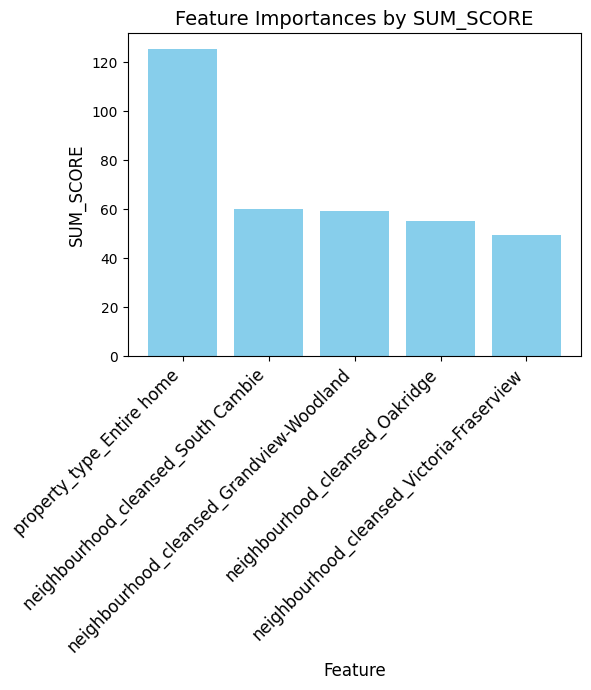

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming `trained_model`, `preprocessor`, and feature sets are defined
cat_features = ['neighbourhood_cleansed', 'property_type', 'room_type']
num_features = ['bedrooms', 'beds', 'baths', 'accommodates',              
                'review_scores_rating', 'review_scores_accuracy',
                'review_scores_cleanliness', 'review_scores_checkin',
                'review_scores_communication', 'review_scores_location',
                'review_scores_value', 'reviews_per_month']


# Extract weights from the first layer of the neural network
weights = trained_model.fc1.weight.detach().cpu().numpy()

# Calculate feature importance using SUM_SCORE (sum of absolute weights for each feature)
feature_importance = np.sum(np.abs(weights), axis=0)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': all_feature_names, 'SUM_SCORE': feature_importance})
importance_df = importance_df.sort_values(by='SUM_SCORE', ascending=False)

# Select the top 5 features
top_5_features = importance_df.head(5)

# Plot the feature importances
plt.figure(figsize=(6, 7))  # Adjust figure size
plt.bar(top_5_features['Feature'], top_5_features['SUM_SCORE'], color='skyblue')  # Vertical bar plot
plt.title('Feature Importances by SUM_SCORE', fontsize=14)
plt.ylabel('SUM_SCORE', fontsize=12)
plt.xlabel('Feature', fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



/var/folders/gp/r9106f0d7cv0pg55j8gs_g7h0000gn/T/ipykernel_65424/2035177196.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_revenue_by_accommodates = data.groupby('accommodates')['monthly_revenue'].mean()


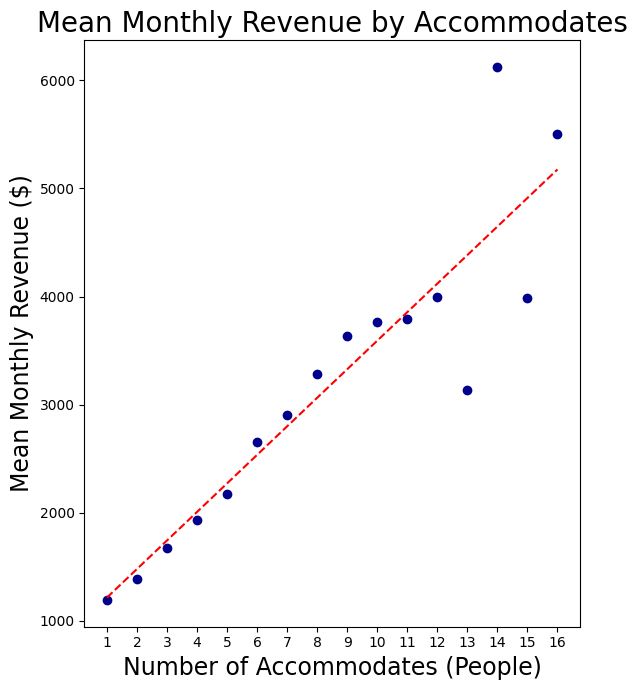

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation (as before)
data = train_df
data['accommodates'] = data['accommodates'].astype('category')
mean_revenue_by_accommodates = data.groupby('accommodates')['monthly_revenue'].mean()

# Convert the result to a DataFrame for better visualization
summary = mean_revenue_by_accommodates.reset_index()
summary.columns = ['Accommodates', 'Mean_Monthly_Revenue']
summary = summary.sort_values(by='Accommodates')

# Linear Regression Line
x = summary['Accommodates'].astype(float)  # Convert 'Accommodates' to float for regression
y = summary['Mean_Monthly_Revenue']
coefficients = np.polyfit(x, y, deg=1)  # Fit a linear regression line (degree = 1)
linear_regression_line = np.poly1d(coefficients)  # Create the regression line function

# Extract the slope (coefficient) and intercept
slope = coefficients[0]
intercept = coefficients[1]

# Calculate the percentage increase
mean_revenue = y.mean()  # Mean of the target variable
percentage_increase = (slope / mean_revenue) * 100

# Calculate residuals and standard error of the slope
residuals = y - linear_regression_line(x)  # Actual - Predicted
std_dev_residuals = np.std(residuals, ddof=1)  # Standard deviation of residuals
x_deviation = np.sqrt(np.sum((x - np.mean(x))**2))  # Sum of squared deviations of x
standard_error = std_dev_residuals / x_deviation  # Standard error of the slope

# Plot scatter and linear regression line
plt.figure(figsize=(6, 7))
plt.scatter(summary['Accommodates'], summary['Mean_Monthly_Revenue'], color='darkblue', label='Data Points')
plt.plot(x, linear_regression_line(x), color='red', linestyle='--', label='Linear Regression Line')  # Add regression line

# Annotate slope (with standard error), intercept, and percentage increase
slope_text = f"Slope: {slope:.2f} ± {standard_error:.2f}"
intercept_text = f"Intercept: {intercept:.2f}"
percentage_text = f"Percentage Increase: {percentage_increase:.2f}%"


# Set plot details
plt.title('Mean Monthly Revenue by Accommodates', fontsize=20)
plt.xlabel('Number of Accommodates (People)', fontsize=17)
plt.ylabel('Mean Monthly Revenue ($)', fontsize=17)
plt.xticks(summary['Accommodates'])
plt.tight_layout()
plt.show()


In [65]:

# Print slope, intercept, percentage increase, and standard error in the desired format
print(f"Slope: {slope:.2f} ± {standard_error:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Percentage Increase in Mean Monthly Revenue per Unit Increase in Accommodates: {percentage_increase:.2f}%")


Slope: 263.97 ± 31.13
Intercept: 951.79
Percentage Increase in Mean Monthly Revenue per Unit Increase in Accommodates: 8.26%


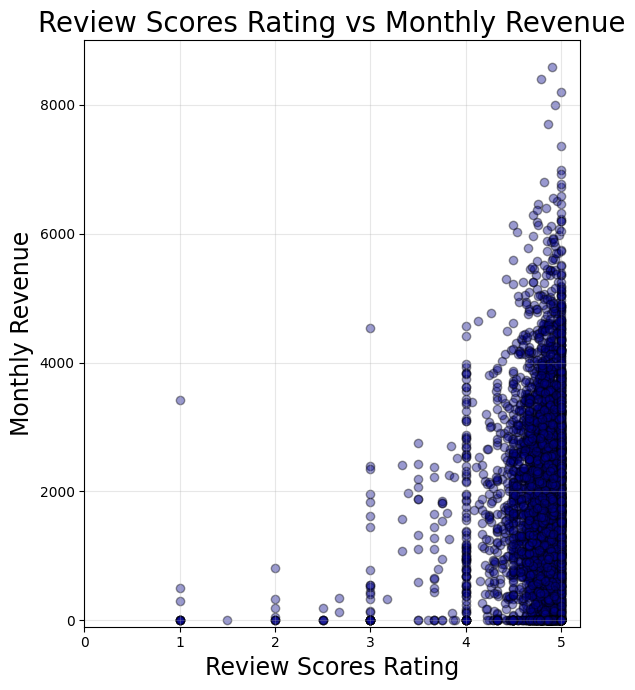

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data preparation (ensure the necessary columns exist)
data = pd.read_csv('data/train.csv')
data = data.dropna(subset=['review_scores_rating', 'monthly_revenue'])  # Drop rows with missing values

# Extract x (review_scores_rating) and y (monthly_revenue)
x = data['review_scores_rating']
y = data['monthly_revenue']

# Fit a linear regression line


# Generate x values from 0 to 5.2 for the regression line
x_range = np.linspace(0, 5.2, 100)  # 100 evenly spaced points between 0 and 5.2
y_range = regression_line(x_range)  # Compute the corresponding y values

# Scatter plot of review_scores_rating vs. monthly_revenue
plt.figure(figsize=(6, 7))
plt.scatter(data['review_scores_rating'], data['monthly_revenue'], color='darkblue', alpha=0.4, edgecolor='k', label='Data Points')


# Add titles and labels
plt.title('Review Scores Rating vs Monthly Revenue', fontsize=20)
plt.xlabel('Review Scores Rating', fontsize=17)
plt.ylabel('Monthly Revenue', fontsize=17)

# Enhance visualization
plt.ylim(-100,9000)
plt.xlim(0, 5.2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


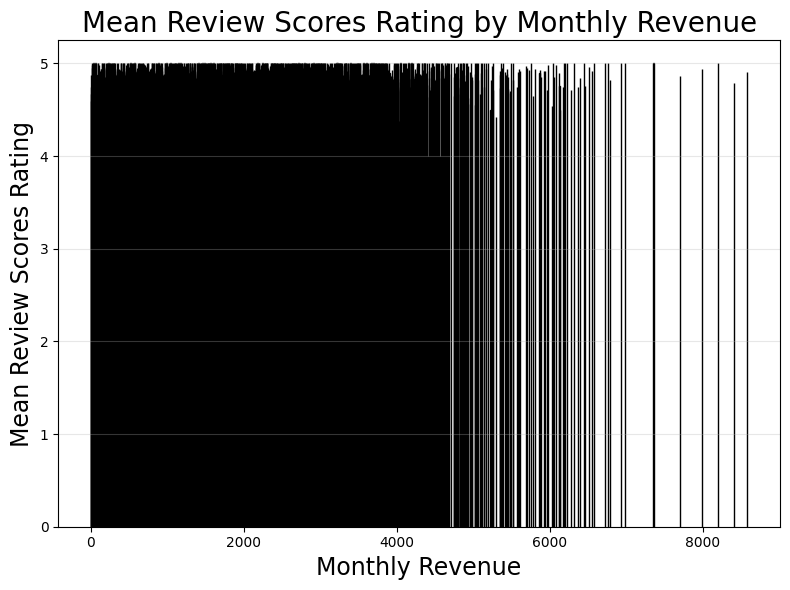

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation (ensure the necessary columns exist)
data = pd.read_csv('data/train.csv')
data = data.dropna(subset=['review_scores_rating', 'monthly_revenue'])  # Drop rows with missing values

# Group by monthly_revenue and calculate mean review_scores_rating
mean_rating_by_revenue = data.groupby('monthly_revenue')['review_scores_rating'].mean()

# Convert to DataFrame for easier plotting
summary = mean_rating_by_revenue.reset_index()
summary.columns = ['Monthly Revenue', 'Mean Review Scores Rating']

# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(summary['Monthly Revenue'], summary['Mean Review Scores Rating'], color='skyblue', edgecolor='k')

# Add titles and labels
plt.title('Mean Review Scores Rating by Monthly Revenue', fontsize=20)
plt.xlabel('Monthly Revenue', fontsize=17)
plt.ylabel('Mean Review Scores Rating', fontsize=17)

# Enhance visualization
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [72]:
# Data preparation (as before)
data = train_df
data['accommodates'] = data['accommodates'].astype('category')
mean_revenue_by_accommodates = data.groupby('accommodates')['monthly_revenue'].mean()

# Convert the result to a DataFrame for better visualization
summary = mean_revenue_by_accommodates.reset_index()
summary.columns = ['Accommodates', 'Mean_Monthly_Revenue']
summary = summary.sort_values(by='Accommodates')

# Calculate the standard deviation and the number of observations
std_dev = summary['Mean_Monthly_Revenue'].std()
n = len(summary)  # Number of unique accommodate groups

# Calculate the standard error
standard_error = std_dev / np.sqrt(n)

# Display the standard error
print(f"Standard Error of Mean Monthly Revenue by Accommodates: {standard_error:.4f}")


Standard Error of Mean Monthly Revenue by Accommodates: 345.4194


/var/folders/gp/r9106f0d7cv0pg55j8gs_g7h0000gn/T/ipykernel_64822/3174471527.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_revenue_by_accommodates = data.groupby('accommodates')['monthly_revenue'].mean()


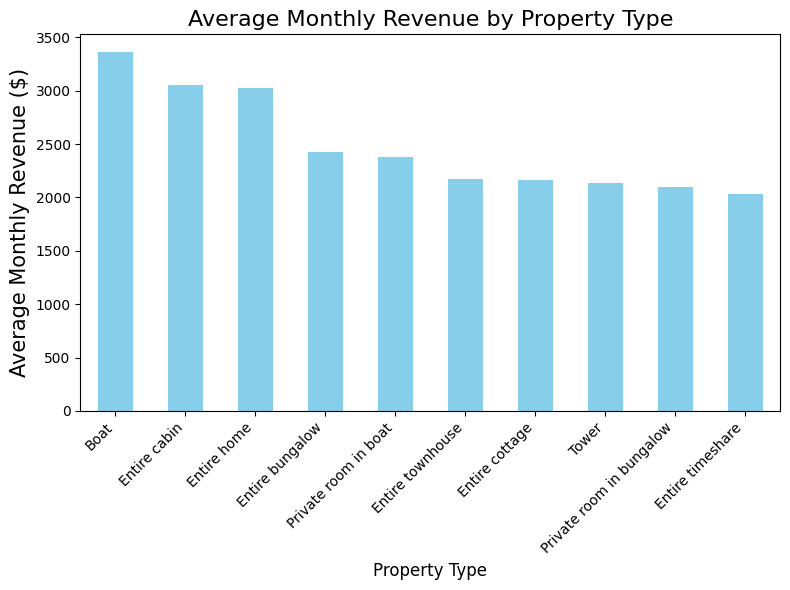

In [47]:
revenue_by_property = train_df.groupby("property_type")["monthly_revenue"].mean().sort_values(ascending=False)
revenue_by_property = revenue_by_property.head(10)

# Plot the sorted revenue by property type
plt.figure(figsize=(8, 6))
revenue_by_property.plot(kind="bar", color="skyblue")
plt.title("Average Monthly Revenue by Property Type", fontsize=16)
plt.xlabel("Property Type", fontsize=12)
plt.ylabel("Average Monthly Revenue ($)", fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()  
plt.show()

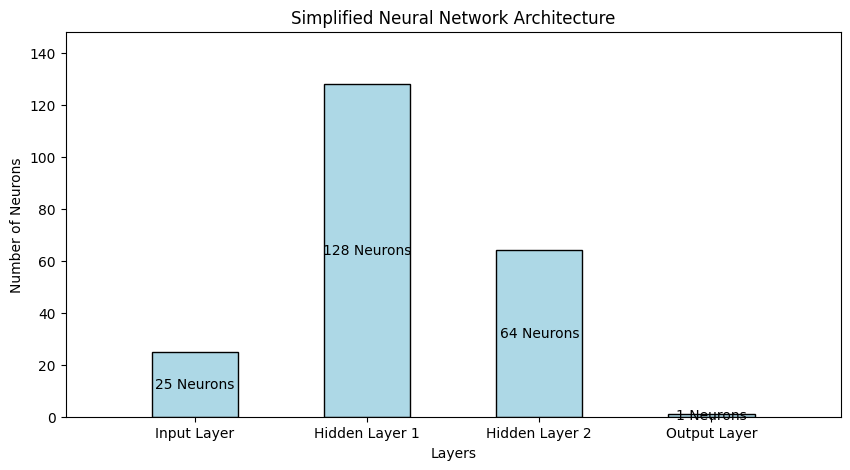

In [48]:
import matplotlib.pyplot as plt

def simplified_nn_visualization():
    layers = [
        {"name": "Input Layer", "neurons": 25},  # Replace with your input_dim
        {"name": "Hidden Layer 1", "neurons": 128},
        {"name": "Hidden Layer 2", "neurons": 64},
        {"name": "Output Layer", "neurons": 1}
    ]

    fig, ax = plt.subplots(figsize=(10, 5))
    for i, layer in enumerate(layers):
        ax.add_patch(plt.Rectangle((i * 2, 0), 1, layer["neurons"], edgecolor="black", facecolor="lightblue"))
        ax.text(i * 2 + 0.5, layer["neurons"] / 2, f"{layer['neurons']} Neurons", ha="center", va="center", fontsize=10)

    ax.set_xlim(-1, len(layers) * 2)
    ax.set_ylim(0, max(layer["neurons"] for layer in layers) + 20)
    ax.set_xticks([i * 2 + 0.5 for i in range(len(layers))])
    ax.set_xticklabels([layer["name"] for layer in layers])
    ax.set_title("Simplified Neural Network Architecture")
    ax.set_xlabel("Layers")
    ax.set_ylabel("Number of Neurons")
    plt.show()

simplified_nn_visualization()


In [49]:
from torchinfo import summary
cat_features = ['host_is_superhost',
                    'neighbourhood_cleansed', 'property_type', 'room_type']
num_features = [#'price', 
                    'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm',
                    'maximum_nights_avg_ntm', #'availability_30', 'availability_60',
                    #'availability_90', 'availability_365', 
                    'number_of_reviews','number_of_reviews_ltm', 
                    'review_scores_rating', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location',
                    'review_scores_value', 'reviews_per_month', 
                    'bedrooms', 'beds', 'baths', 'accommodates', 
                    'has_restaurant', 
                    'has_downtown', 
                    'has_park', 
                    'has_city', 
                    #'has_coffee',#	'has_bus', 
                    'has_stores', #'rating',
                    'polarity', 'subjectivity', 
                    #'review_length', 
                    'has_shop'
                   ]
# Generate model summary
input_dim = len(cat_features) + len(num_features)
model = RevenuePredictor(input_dim)
summary(model, input_size=(1, input_dim))  # Displays parameters and memory usage


Layer (type:depth-idx)                   Output Shape              Param #
RevenuePredictor                         [1, 1]                    --
├─Linear: 1-1                            [1, 128]                  3,968
├─Dropout: 1-2                           [1, 128]                  --
├─Linear: 1-3                            [1, 64]                   8,256
├─Linear: 1-4                            [1, 1]                    65
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 0.05

In [50]:
from torchviz import make_dot
import torch

# Assuming RevenuePredictor is your model class
model = RevenuePredictor(input_dim=16)  # Replace `10` with the actual input_dim from your dataset
dummy_input = torch.randn(1, 16)  # Create a dummy input with the same shape as the input_dim

# Generate the visualization
output = model(dummy_input)
dot = make_dot(output, params=dict(model.named_parameters()))
dot.render("neural_network_architecture", format="png")

'neural_network_architecture.png'

Validation MSE: 1186079.0000


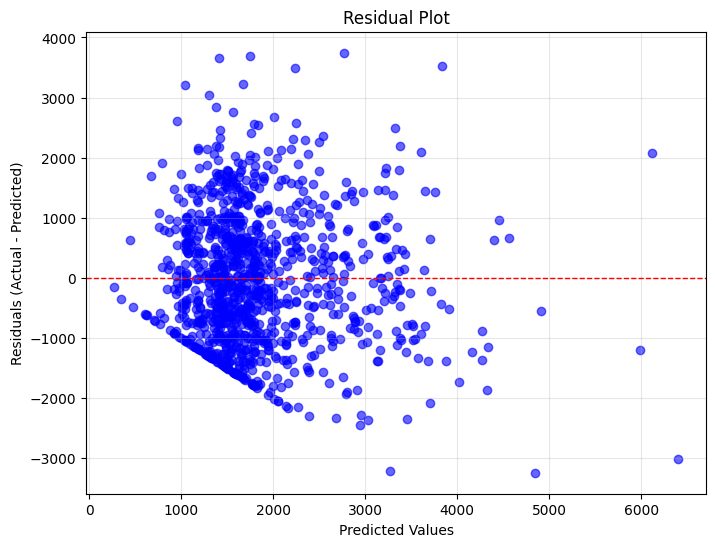

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions for the validation set
def evaluate_on_validation(model, val_loader, device):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    targets = []

    with torch.no_grad():
        for features, labels in val_loader:
            features = features.to(device)
            labels = labels.to(device)
            outputs = model(features)
            predictions.extend(outputs.cpu().numpy().squeeze())  # Collect predictions
            targets.extend(labels.cpu().numpy())  # Collect actual labels

    return np.array(targets), np.array(predictions)

# Call the function
val_targets, val_predictions = evaluate_on_validation(trained_model, val_loader, device)

# Calculate validation MSE
val_mse = mean_squared_error(val_targets, val_predictions)
print(f"Validation MSE: {val_mse:.4f}")

def plot_residuals(y_true, y_pred):
    """
    Plots the residuals between actual and predicted values.
    
    Args:
        y_true (array-like): True values (ground truth).
        y_pred (array-like): Predicted values from the model.
    """
    residuals = y_true - y_pred

    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.6, color="blue")
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.title("Residual Plot")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.grid(alpha=0.3)
    plt.show()

# Use the model's predictions on the validation set
val_predictions = np.array(val_predictions).flatten()
val_targets = np.array(val_targets).flatten()

# Plot residuals
plot_residuals(val_targets, val_predictions)


## Training with Linear Regression (LR)

In [52]:
# Linear regression
import joblib 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#Select features and target
features = ['accommodates', 'beds', 'baths', 'bedrooms', #'price', 
            #'availability_90', 'availability_365', 'number_of_reviews', 
            'review_scores_rating', 'review_scores_cleanliness', 
            'review_scores_communication', 'review_scores_location', 
            #'review_scores_value',
            'polarity', 'subjectivity',            
           ]

target = 'monthly_revenue'

# Define X (features) and y (target)
X = train_df[features]
y = train_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved as 'linear_regression_model.pkl'")

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Show model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nModel Coefficients:")
print(coefficients)


Model saved as 'linear_regression_model.pkl'
Linear Regression Model Performance:
Mean Absolute Error (MAE): 917.34
Mean Squared Error (MSE): 1278891.10
Root Mean Squared Error (RMSE): 1130.88
R-squared (R²): 0.21

Model Coefficients:
                       Feature  Coefficient
4         review_scores_rating   369.707815
8                     polarity   208.249165
0                 accommodates   197.331919
3                     bedrooms   145.358801
5    review_scores_cleanliness    64.597712
2                        baths    52.716254
1                         beds    46.184887
9                 subjectivity   -10.803164
6  review_scores_communication  -114.296030
7       review_scores_location  -206.510259


In [53]:
import joblib
import pandas as pd

# Load the saved model
linear_regression_model = joblib.load('linear_regression_model.pkl')

# Ensure the test dataset contains only the necessary features
model_testing_data = test_df[features].copy()

# Handle missing values in the test dataset
model_testing_data = model_testing_data.fillna(0)  # Replace NaN with 0 or an appropriate value

# Make predictions on the testing data
predicted_rev = linear_regression_model.predict(model_testing_data)

# Create a DataFrame for the predicted revenue
predicted_rev_df = pd.DataFrame(predicted_rev, columns=['monthly_revenue'])

# Combine the predictions with the test dataset (assuming the test dataset has an 'id' column)
linear_regression_dataset = pd.concat([test_df['id'], predicted_rev_df], axis=1)

# Display the result
print(linear_regression_dataset.head())
print("NAs: ", linear_regression_dataset['monthly_revenue'].isna().sum())


                   id  monthly_revenue
0             4465400      3495.515440
1  608629349064811166       968.635173
2  981894508939312892      1950.493078
3            52014961      2151.763014
4  836285112356489303      1523.416141
NAs:  0


In [54]:
linear_regression_dataset.to_csv('linear_regression.csv', index=False)

## END
The remaining code are from Mr. SS

In [55]:
X_test = test_df[features]

# Scale the test features using the same scaler used for training
X_test_scaled = scaler.transform(X_test)  # Use the scaler already fitted on training data

# Predict monthly revenue for the test set
test_df['monthly_revenue'] = regressor.predict(X_test_scaled)

# Save the predictions in the required format for submission
submission = test_df[['id', 'monthly_revenue']]  # Replace 'id' with the appropriate column name in your test set
submission.to_csv('submission.csv', index=False)

print("Predictions for the test set have been saved to submission.csv")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- accommodates
- baths
- bedrooms
- beds
- polarity
- ...
Feature names seen at fit time, yet now missing:
- host_acceptance_rate
- host_response_rate
- number_of_reviews
- number_of_reviews_ltm
- review_scores_accuracy
- ...


In [ ]:
X = train_df.drop(columns = ['monthly_revenue','name', 'host_name'])
y = train_df['monthly_revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [109]:
X_train.columns

Index(['Unnamed: 0', 'neighborhood_overview', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'rating',
       'bedrooms', 'baths', 'is_new_listing', 'has_restaurant', 'has_downtown',
       'has_park', 'has_city', 'has_coffee', 'has_bus', 'has_stores',
       'polarity', 'subjectivity', 'review_length', 'has_sho

In [110]:
response_time_mapping = {
    "within an hour": 1,
    "within a few hours": 2,
    "within a day": 3,
    "within a week": 4
}
X_train['host_response_time'] = X_train['host_response_time'].map(response_time_mapping)

KeyError: 'host_response_time'

In [35]:
numeric_features = [
    'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count',
    'accommodates', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
    'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month', 'rating', 'bedrooms', 'baths',
    'review_length', 'polarity', 'subjectivity', 'latitude', 'longitude'
]

categorical_features = ['property_type', 'room_type', 'neighbourhood', 'neighbourhood_cleansed']

ordinal_features = ['host_response_time'] 

binary_features = [
    'host_is_superhost', 'instant_bookable', 'is_new_listing', 'has_park', 'has_restaurant', 
    'has_shopping', 'has_beach', 'has_quiet', 'has_transit', 'has_lively', 'has_trendy'
]

In [43]:
numeric_transformer = StandardScaler()

In [47]:
ordinal_transformer = OrdinalEncoder(
    categories = [response_time_mapping], 
    dtype = int)

In [48]:
binary_transformer = OneHotEncoder(
    handle_unknown="ignore", 
    sparse_output=False, 
    drop='if_binary', 
    dtype = int
)

In [49]:
si = SimpleImputer(strategy="constant", fill_value="missing")

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False, dtype = int)

categorical_transformer = make_pipeline(si, ohe)

In [52]:
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    #("drop", drop_features)
)

In [53]:
transformed_df = preprocessor.fit_transform(X_train)

ValueError: could not convert string to float: '$123.00'